
# Data Exploration and Cleaning
**This notebook runs locally**

Basic data exploration and cleaning, including handling missing data, adding useful columns and image statistics.

Needed for this notebook:
* CSV file with parts data
* Images ending with '.jpg' or '.jpeg'

In [1]:
import pandas as pd
import numpy as np
import os
import copy
from PIL import Image
import statistics
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Paths and filenames - change according to your system
raw_data_path = "../../data/raw"
processed_data_path = "../../data/processed"
csv_filename = "SyrusMasterDataAnonymised.csv" # created from the original .xlsx file, manually removed nested columns
image_subdir = "SyrusImage"
processed_data_csv_file = "SyrusMasterDataAnonymisedProc.csv"

## Data Loading and Exploration

In [3]:
df_raw = pd.read_csv(os.path.join(raw_data_path, csv_filename))
df = copy.deepcopy(df_raw)
df.head()

,Item number,English item name,German item name,English item name clean,German item name clean,Weight kg,Entity,CurrentFamily,CurrentSyntegonSubFamily,PVFamily,PVSubFamily
0,A3,BAR GRIP,BAR GRIP,Bar grip,Bar grip,NaN,104.0,BAR PARTS,BAR,AXLE & SHAFT PARTS,AXLE
1,A4,BAR TOP MTG,BAR TOP MTG,Bar top mtg,Bar top mtg,NaN,104.0,BAR PARTS,BAR,AXLE & SHAFT PARTS,AXLE
2,A5,TIE BAR,TIE BAR,Tie bar,Tie bar,NaN,104.0,BAR PARTS,BAR,AXLE & SHAFT PARTS,AXLE
3,A6,BAR-TIE 5',BAR-TIE 5',Bar tie,Bar tie,NaN,104.0,BAR PARTS,BAR,AXLE & SHAFT PARTS,AXLE
4,A7,BAR,Leiste,Bar,Leiste,NaN,110.0,BAR PARTS,BAR,BAR PARTS,BARS


In [4]:
df.shape

(13450, 11)

In [5]:
df = df.rename(columns = {"Item number": "ItemNumber",
                         "English item name": "EnglishItemName",
                         "German item name": "GermanItemName",
                         "English item name clean": "EnglishItemNameClean",
                         "German item name clean": "GermanItemNameClean",
                         "Weight kg": "Weight_kg"}
              )

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13450 entries, 0 to 13449
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ItemNumber                13450 non-null  object 
 1   EnglishItemName           13369 non-null  object 
 2   GermanItemName            13369 non-null  object 
 3   EnglishItemNameClean      13448 non-null  object 
 4   GermanItemNameClean       13450 non-null  object 
 5   Weight_kg                 9538 non-null   object 
 6   Entity                    13369 non-null  float64
 7   CurrentFamily             13450 non-null  object 
 8   CurrentSyntegonSubFamily  13450 non-null  object 
 9   PVFamily                  13450 non-null  object 
 10  PVSubFamily               13450 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.1+ MB


### Checking unique values and their number for different variables

In [7]:
df.ItemNumber.nunique()

13450

In [8]:
df.EnglishItemNameClean.nunique()

3280

In [9]:
df.GermanItemNameClean.nunique()

4380

In [10]:
df.PVFamily.nunique()  

12

In [11]:
# Number of unique 'PVSubFamily' values in each 'PVFamily'
df.groupby(['PVFamily'])['PVSubFamily'].nunique()

PVFamily
AXLE & SHAFT PARTS      1
BAR PARTS               6
BEAM PARTS              3
BELOW PARTS             2
BLOCK PARTS             1
CAM PARTS               1
FORMAT & SIZE PARTS     1
KNIFE PARTS            18
PLUG PARTS              1
PUSHER PARTS           23
ROLLER PARTS           31
SLIDE PARTS            10
Name: PVSubFamily, dtype: int64

### Checking missing values

In [12]:
df.isna().sum()

ItemNumber                     0
EnglishItemName               81
GermanItemName                81
EnglishItemNameClean           2
GermanItemNameClean            0
Weight_kg                   3912
Entity                        81
CurrentFamily                  0
CurrentSyntegonSubFamily       0
PVFamily                       0
PVSubFamily                    0
dtype: int64

In [13]:
df[df["EnglishItemNameClean"].isna()]

,ItemNumber,EnglishItemName,GermanItemName,EnglishItemNameClean,GermanItemNameClean,Weight_kg,Entity,CurrentFamily,CurrentSyntegonSubFamily,PVFamily,PVSubFamily
5315,A5318,DRIVE ROLLER R~5m,Antriebsrolle,NaN,Antriebsrolle,"1,138",106.0,ROLLER PARTS,DRIVE ROLLER,ROLLER PARTS,COMPLEX DRIVE ROLLER
7247,A7250,Paddle Pusher 28x~25mm,. . .,NaN,. . .,"0,003",103.0,PUSHER PARTS,PUSHER,PUSHER PARTS,PUSHER PADDLE


### Replacing dots and zeros with NaN

In [14]:
df.replace(". . .", np.nan, inplace=True)
df.replace("0", np.nan, inplace=True)
df.isna().sum()

ItemNumber                     0
EnglishItemName               81
GermanItemName                96
EnglishItemNameClean          83
GermanItemNameClean          104
Weight_kg                   3912
Entity                        81
CurrentFamily                  0
CurrentSyntegonSubFamily       0
PVFamily                       0
PVSubFamily                    0
dtype: int64

In [15]:
df[df["EnglishItemNameClean"].isna()]

,ItemNumber,EnglishItemName,GermanItemName,EnglishItemNameClean,GermanItemNameClean,Weight_kg,Entity,CurrentFamily,CurrentSyntegonSubFamily,PVFamily,PVSubFamily
2951,A2954,NaN,NaN,NaN,NaN,NaN,NaN,SLIDE PARTS,SLIDE OTHERS,SLIDE PARTS,SLIDE GUIDE
2954,A2957,NaN,NaN,NaN,NaN,NaN,NaN,SLIDE PARTS,SLIDE OTHERS,SLIDE PARTS,SLIDE GUIDE
2955,A2958,NaN,NaN,NaN,NaN,NaN,NaN,SLIDE PARTS,SLIDE OTHERS,SLIDE PARTS,SLIDE GUIDE
3938,A3941,NaN,NaN,NaN,NaN,NaN,NaN,ROLLER PARTS,ROLLER,ROLLER PARTS,SIMPLE BUSHING
3958,A3961,NaN,NaN,NaN,NaN,NaN,NaN,ROLLER PARTS,ROLLER,ROLLER PARTS,SIMPLE ROLLER
...,...,...,...,...,...,...,...,...,...,...,...
5900,A5903,NaN,NaN,NaN,NaN,NaN,NaN,ROLLER PARTS,DRIVE ROLLER,ROLLER PARTS,COMPLEX DRIVE ROLLER
5917,A5920,NaN,NaN,NaN,NaN,NaN,NaN,ROLLER PARTS,DRIVE ROLLER,ROLLER PARTS,COMPLEX DRIVE ROLLER
5921,A5924,NaN,NaN,NaN,NaN,NaN,NaN,ROLLER PARTS,DRIVE ROLLER,ROLLER PARTS,COMPLEX DRIVE ROLLER
5929,A5932,NaN,NaN,NaN,NaN,NaN,NaN,ROLLER PARTS,DRIVE ROLLER,ROLLER PARTS,COMPLEX DRIVE ROLLER


## Adding Some Useful Columns
### Adding "target" column with "PVFamily_PVSubFamily"

In [16]:

df["target"] = df.apply(lambda row: row["PVFamily"] + "_" + row["PVSubFamily"], axis=1)
df.head()

,ItemNumber,EnglishItemName,GermanItemName,EnglishItemNameClean,GermanItemNameClean,Weight_kg,Entity,CurrentFamily,CurrentSyntegonSubFamily,PVFamily,PVSubFamily,target
0,A3,BAR GRIP,BAR GRIP,Bar grip,Bar grip,NaN,104.0,BAR PARTS,BAR,AXLE & SHAFT PARTS,AXLE,AXLE & SHAFT PARTS_AXLE
1,A4,BAR TOP MTG,BAR TOP MTG,Bar top mtg,Bar top mtg,NaN,104.0,BAR PARTS,BAR,AXLE & SHAFT PARTS,AXLE,AXLE & SHAFT PARTS_AXLE
2,A5,TIE BAR,TIE BAR,Tie bar,Tie bar,NaN,104.0,BAR PARTS,BAR,AXLE & SHAFT PARTS,AXLE,AXLE & SHAFT PARTS_AXLE
3,A6,BAR-TIE 5',BAR-TIE 5',Bar tie,Bar tie,NaN,104.0,BAR PARTS,BAR,AXLE & SHAFT PARTS,AXLE,AXLE & SHAFT PARTS_AXLE
4,A7,BAR,Leiste,Bar,Leiste,NaN,110.0,BAR PARTS,BAR,BAR PARTS,BARS,BAR PARTS_BARS


### Adding "hasImage" column indicating whether an image exists for the given part

In [17]:
def has_image(item_number):
    '''
    Checks if an image file exists for the given item number.

    Parameters:
    - item_number (str): Item number for which the existence of an image is checked.

    Returns:
    - bool: True if an image file exists, False otherwise.
    '''
    image_file = item_number + ".jpeg"
    return os.path.isfile(os.path.join(raw_data_path, image_subdir, image_file))

has_image("A3") # should be True

True

In [18]:
has_image("A4") # should be False

False

In [19]:
df["hasImage"] = df.apply(lambda row: 1 if has_image(row["ItemNumber"]) else 0, axis=1)
df.head()

,ItemNumber,EnglishItemName,GermanItemName,EnglishItemNameClean,GermanItemNameClean,Weight_kg,Entity,CurrentFamily,CurrentSyntegonSubFamily,PVFamily,PVSubFamily,target,hasImage
0,A3,BAR GRIP,BAR GRIP,Bar grip,Bar grip,NaN,104.0,BAR PARTS,BAR,AXLE & SHAFT PARTS,AXLE,AXLE & SHAFT PARTS_AXLE,1
1,A4,BAR TOP MTG,BAR TOP MTG,Bar top mtg,Bar top mtg,NaN,104.0,BAR PARTS,BAR,AXLE & SHAFT PARTS,AXLE,AXLE & SHAFT PARTS_AXLE,0
2,A5,TIE BAR,TIE BAR,Tie bar,Tie bar,NaN,104.0,BAR PARTS,BAR,AXLE & SHAFT PARTS,AXLE,AXLE & SHAFT PARTS_AXLE,0
3,A6,BAR-TIE 5',BAR-TIE 5',Bar tie,Bar tie,NaN,104.0,BAR PARTS,BAR,AXLE & SHAFT PARTS,AXLE,AXLE & SHAFT PARTS_AXLE,0
4,A7,BAR,Leiste,Bar,Leiste,NaN,110.0,BAR PARTS,BAR,BAR PARTS,BARS,BAR PARTS_BARS,0


In [20]:
number_images = df["hasImage"].sum()
number_images

7578

## Labels Counts Distribution

### Checking number of unique labels and number of parts with each label

In [21]:
df.target.nunique()

98

In [22]:
df.target.value_counts()

target
BAR PARTS_BARS                      1999
PUSHER PARTS_OTHER                  1267
KNIFE PARTS_OTHER                   1026
ROLLER PARTS_SIMPLE ROLLER           694
KNIFE PARTS_STRAIGHT KNIFE           574
                                    ... 
ROLLER PARTS_SIMPLE RUBER ROLLER       1
ROLLER PARTS_SIMPLE SLEEVE             1
ROLLER PARTS_COMPLEX ROLLER BOLT       1
ROLLER PARTS_SIMPLE RAIL               1
SLIDE PARTS_BAR                        1
Name: count, Length: 98, dtype: int64

In [23]:
# Seldom labels
#df.target.value_counts()[80:]

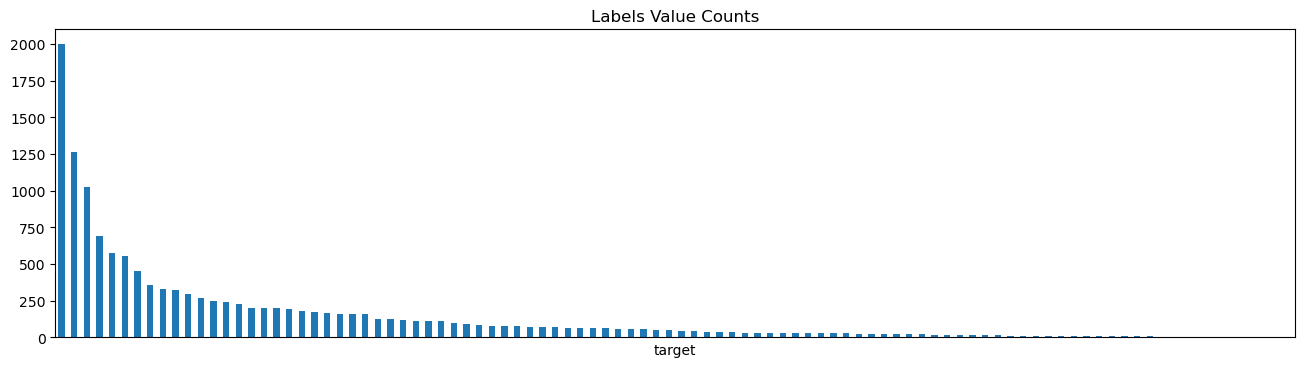

In [24]:
plt.subplots(figsize=(16, 4))
df.target.value_counts().plot(kind="bar")
plt.title("Labels Value Counts") #  PV-Family_PV-Sub-family
plt.xticks([]) # hide label names
plt.show()

In [25]:
df_with_images = df[df.hasImage == 1]
len(df_with_images)

7578

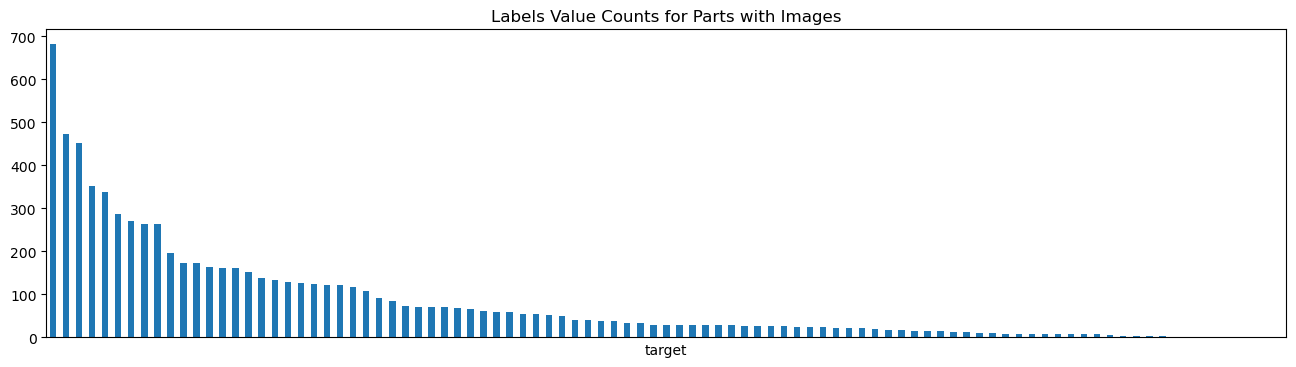

In [26]:
plt.subplots(figsize=(16, 4))
df_with_images.target.value_counts().plot(kind="bar")
plt.title("Labels Value Counts for Parts with Images") # (PV-Family_PV-Sub-family)
plt.xticks([])
plt.show()

### Count target labels having images with counts above a certain threshold

In [27]:
value_counts = df_with_images.target.value_counts()
threshold = 50
filtered_groups = value_counts[value_counts >= threshold]
print(f"Number of PV-Family_PV-Sub-family labels having images with counts above or equal to {threshold}: {len(filtered_groups)}")

Number of PV-Family_PV-Sub-family labels having images with counts above or equal to 50: 39


## Handling Missing Data

### Dropping all rows that have absolutely no info

In [28]:
df[(df["EnglishItemName"].isna()) & (df["GermanItemName"].isna()) &  (df["EnglishItemNameClean"].isna()) & (df["GermanItemNameClean"].isna()) & (df["Weight_kg"].isna()) & (df["Entity"].isna()) & (df["hasImage"] == 0) ]

,ItemNumber,EnglishItemName,GermanItemName,EnglishItemNameClean,GermanItemNameClean,Weight_kg,Entity,CurrentFamily,CurrentSyntegonSubFamily,PVFamily,PVSubFamily,target,hasImage
4065,A4068,NaN,NaN,NaN,NaN,NaN,NaN,ROLLER PARTS,ROLLER OTHERS,AXLE & SHAFT PARTS,AXLE,AXLE & SHAFT PARTS_AXLE,0
4302,A4305,NaN,NaN,NaN,NaN,NaN,NaN,ROLLER PARTS,ROLLER,ROLLER PARTS,SIMPLE ROLLER BOLT,ROLLER PARTS_SIMPLE ROLLER BOLT,0
4745,A4748,NaN,NaN,NaN,NaN,NaN,NaN,ROLLER PARTS,ADVANCE ROLLER,ROLLER PARTS,SIMPLE PAPPER ADVANCE ROLLER,ROLLER PARTS_SIMPLE PAPPER ADVANCE ROLLER,0
4807,A4810,NaN,NaN,NaN,NaN,NaN,NaN,ROLLER PARTS,ROLLER,ROLLER PARTS,SIMPLE ROLLER,ROLLER PARTS_SIMPLE ROLLER,0
4812,A4815,NaN,NaN,NaN,NaN,NaN,NaN,ROLLER PARTS,ROLLER,ROLLER PARTS,SIMPLE ROLLER,ROLLER PARTS_SIMPLE ROLLER,0
4829,A4832,NaN,NaN,NaN,NaN,NaN,NaN,ROLLER PARTS,ROLLER OTHERS,ROLLER PARTS,SIMPLE ROLLER,ROLLER PARTS_SIMPLE ROLLER,0
4864,A4867,NaN,NaN,NaN,NaN,NaN,NaN,ROLLER PARTS,DRIVE ROLLER,ROLLER PARTS,SIMPLE DRIVE ROLLER,ROLLER PARTS_SIMPLE DRIVE ROLLER,0
4927,A4930,NaN,NaN,NaN,NaN,NaN,NaN,ROLLER PARTS,ROLLER,ROLLER PARTS,SIMPLE ROLLER,ROLLER PARTS_SIMPLE ROLLER,0
4930,A4933,NaN,NaN,NaN,NaN,NaN,NaN,ROLLER PARTS,ROLLER,ROLLER PARTS,SIMPLE ROLLER,ROLLER PARTS_SIMPLE ROLLER,0
5076,A5079,NaN,NaN,NaN,NaN,NaN,NaN,ROLLER PARTS,BELT ROLLER,ROLLER PARTS,SIMPLE BELT ROLLER,ROLLER PARTS_SIMPLE BELT ROLLER,0


In [29]:
df = df.drop(df[(df["EnglishItemName"].isna()) & (df["GermanItemName"].isna()) &  (df["EnglishItemNameClean"].isna())&  (df["GermanItemNameClean"].isna())&  (df["Weight_kg"].isna()) &  (df["Entity"].isna()) &(df["hasImage"] == 0) ].index)

In [30]:
df[(df["EnglishItemName"].isna()) & (df["GermanItemName"].isna()) &  (df["EnglishItemNameClean"].isna()) & (df["GermanItemNameClean"].isna()) & (df["Weight_kg"].isna()) & (df["Entity"].isna()) & (df["hasImage"] == 0) ]

,ItemNumber,EnglishItemName,GermanItemName,EnglishItemNameClean,GermanItemNameClean,Weight_kg,Entity,CurrentFamily,CurrentSyntegonSubFamily,PVFamily,PVSubFamily,target,hasImage


### Manually filling missing data for some specific rows

In [31]:
df[df["ItemNumber"] == "A5318"]

,ItemNumber,EnglishItemName,GermanItemName,EnglishItemNameClean,GermanItemNameClean,Weight_kg,Entity,CurrentFamily,CurrentSyntegonSubFamily,PVFamily,PVSubFamily,target,hasImage
5315,A5318,DRIVE ROLLER R~5m,Antriebsrolle,NaN,Antriebsrolle,"1,138",106.0,ROLLER PARTS,DRIVE ROLLER,ROLLER PARTS,COMPLEX DRIVE ROLLER,ROLLER PARTS_COMPLEX DRIVE ROLLER,1


In [32]:
df.loc[df["ItemNumber"] == "A5318", "EnglishItemNameClean"] = "Drive roller"

In [33]:
df[df["ItemNumber"] == "A5318"]

,ItemNumber,EnglishItemName,GermanItemName,EnglishItemNameClean,GermanItemNameClean,Weight_kg,Entity,CurrentFamily,CurrentSyntegonSubFamily,PVFamily,PVSubFamily,target,hasImage
5315,A5318,DRIVE ROLLER R~5m,Antriebsrolle,Drive roller,Antriebsrolle,"1,138",106.0,ROLLER PARTS,DRIVE ROLLER,ROLLER PARTS,COMPLEX DRIVE ROLLER,ROLLER PARTS_COMPLEX DRIVE ROLLER,1


In [34]:
df[df["ItemNumber"] == "A7250"]

,ItemNumber,EnglishItemName,GermanItemName,EnglishItemNameClean,GermanItemNameClean,Weight_kg,Entity,CurrentFamily,CurrentSyntegonSubFamily,PVFamily,PVSubFamily,target,hasImage
7247,A7250,Paddle Pusher 28x~25mm,NaN,NaN,NaN,"0,003",103.0,PUSHER PARTS,PUSHER,PUSHER PARTS,PUSHER PADDLE,PUSHER PARTS_PUSHER PADDLE,1


In [35]:
df.loc[df["ItemNumber"] == "A7250", "EnglishItemNameClean"] = "Paddle Pusher"

In [36]:
df.loc[df["ItemNumber"] == "A7250", "GermanItemNameClean"] = "Paddle Pusher"

In [37]:
df[df["ItemNumber"] == "A7250"]

,ItemNumber,EnglishItemName,GermanItemName,EnglishItemNameClean,GermanItemNameClean,Weight_kg,Entity,CurrentFamily,CurrentSyntegonSubFamily,PVFamily,PVSubFamily,target,hasImage
7247,A7250,Paddle Pusher 28x~25mm,NaN,Paddle Pusher,Paddle Pusher,"0,003",103.0,PUSHER PARTS,PUSHER,PUSHER PARTS,PUSHER PADDLE,PUSHER PARTS_PUSHER PADDLE,1


### Filling missing German names with English ones

In [38]:
df["GermanItemName"] = df["GermanItemName"].fillna(df["EnglishItemName"])

In [39]:
df["GermanItemNameClean"] = df["GermanItemNameClean"].fillna(df["EnglishItemNameClean"])

In [40]:
df[df["ItemNumber"] == "A12840"]

,ItemNumber,EnglishItemName,GermanItemName,EnglishItemNameClean,GermanItemNameClean,Weight_kg,Entity,CurrentFamily,CurrentSyntegonSubFamily,PVFamily,PVSubFamily,target,hasImage
12837,A12840,KNIFE,KNIFE,Knife,Knife,NaN,123.0,KNIFE PARTS,KNIFE,KNIFE PARTS,OTHER,KNIFE PARTS_OTHER,0


### Correctly formatting weight column
Changing commas to periods and casting to float 

In [41]:
df['Weight_kg'] = df['Weight_kg'].str.replace(',', '.').astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13438 entries, 0 to 13449
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ItemNumber                13438 non-null  object 
 1   EnglishItemName           13369 non-null  object 
 2   GermanItemName            13369 non-null  object 
 3   EnglishItemNameClean      13369 non-null  object 
 4   GermanItemNameClean       13369 non-null  object 
 5   Weight_kg                 9538 non-null   float64
 6   Entity                    13369 non-null  float64
 7   CurrentFamily             13438 non-null  object 
 8   CurrentSyntegonSubFamily  13438 non-null  object 
 9   PVFamily                  13438 non-null  object 
 10  PVSubFamily               13438 non-null  object 
 11  target                    13438 non-null  object 
 12  hasImage                  13438 non-null  int64  
dtypes: float64(2), int64(1), object(10)
memory usage: 1.4+ MB


In [42]:
df.to_csv(os.path.join(processed_data_path, processed_data_csv_file))

### Extracting parts with images but without any information
to a csv file to sent to the company

In [43]:
df2 = df[(df["EnglishItemName"].isna()) & (df["GermanItemName"].isna()) & (df["EnglishItemNameClean"].isna()) & (df["GermanItemNameClean"].isna()) & (df["Weight_kg"].isna()) & (df["Entity"].isna()) & (df["hasImage"] == 1)]

In [44]:
df2.to_csv(os.path.join(processed_data_path, "no_data_has_images.csv"))

## Image Statistics

In [45]:
image_folder = os.path.join(raw_data_path, image_subdir)
image_sizes = {}
len(os.listdir(image_folder))


7578

In [46]:
for filename in os.listdir(image_folder):
    if filename.endswith(('.jpg', '.jpeg')):
        image_path = os.path.join(image_folder, filename)
    
    try:
        img = Image.open(image_path)
        width, height = img.size
        image_sizes[filename] = (width, height)
        img.close()
    except Exception as e:
        print(f"Error reading '{filename}': {str(e)}")

Text(0.5, 0, 'Height (pixels)')

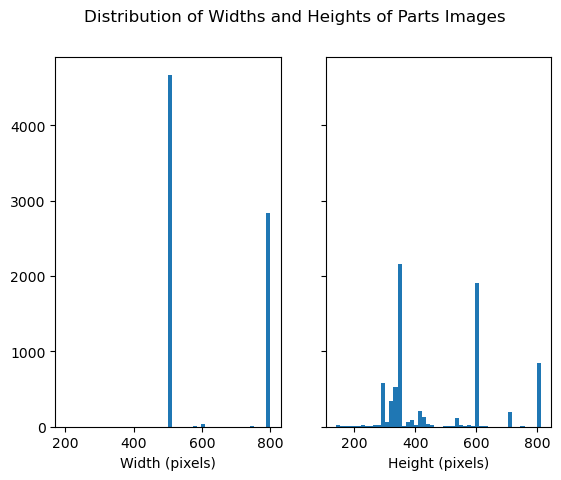

In [47]:
widths = [image_sizes[a][0] for a in image_sizes]
heights = [image_sizes[a][1] for a in image_sizes]
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
fig.suptitle('Distribution of Widths and Heights of Parts Images')
ax1.hist(widths, bins=50)
ax1.set_xlabel('Width (pixels)')
ax2.hist(heights, bins=50)
ax2.set_xlabel('Height (pixels)')

In [48]:
print(f"Mean image height (rounded): {round(np.mean(heights))}")
print(f"Mean image width (rounded): {round(np.mean(widths))}")
print(f"Mean of both: {round((np.mean(heights) + np.mean(widths)) / 2)}")

Mean image height (rounded): 475
Mean image width (rounded): 613
Mean of both: 544


In [49]:
print(f"Mode image height (rounded): {round(statistics.mode(heights))}")
print(f"Mode image width (rounded): {round(statistics.mode(widths))}")

Mode image height (rounded): 353
Mode image width (rounded): 500
